### Dataset Overview
This dataset details basketball field goal attempts during the 2014-2015 season. Specificially, it provides information such as the player who attempted the field goal, where on the court was the field goal attempted, who was the nearest defender, how far away was the nearest defender, time on the shot clock, and much more.

The data was scraped from NBA's REST API. The dataset contains **128,069 observations across 21 columns** and can be found at the link below:

https://www.kaggle.com/dansbecker/nba-shot-logs

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn import ensemble
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
%matplotlib inline

## Read dataset in and begin investigating its properties

In [76]:
shots = pd.read_csv('shot_logs.csv')

In [77]:
shots.shape

(128069, 21)

In [78]:
shots.columns

Index(['GAME_ID', 'MATCHUP', 'LOCATION', 'W', 'FINAL_MARGIN', 'SHOT_NUMBER',
       'PERIOD', 'GAME_CLOCK', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME',
       'SHOT_DIST', 'PTS_TYPE', 'SHOT_RESULT', 'CLOSEST_DEFENDER',
       'CLOSEST_DEFENDER_PLAYER_ID', 'CLOSE_DEF_DIST', 'FGM', 'PTS',
       'player_name', 'player_id'],
      dtype='object')

In [79]:
pd.options.display.max_rows = 999
shots.head(5)

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


In [80]:
shots.describe()

,GAME_ID,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_id
count,1.280690e+05,128069.000000,128069.000000,128069.000000,122502.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000
mean,2.140045e+07,0.208723,6.506899,2.469427,12.453344,2.023355,2.765901,13.571504,2.264670,159038.487284,4.123015,0.452139,0.997314,157238.251247
std,2.578773e+02,13.233267,4.713260,1.139919,5.763265,3.477760,3.043682,8.888964,0.441159,78791.172947,2.756446,0.497706,1.130978,79362.389336
min,2.140000e+07,-53.000000,1.000000,1.000000,0.000000,0.000000,-163.600000,0.000000,2.000000,708.000000,0.000000,0.000000,0.000000,708.000000
25%,2.140023e+07,-8.000000,3.000000,1.000000,8.200000,0.000000,0.900000,4.700000,2.000000,101249.000000,2.300000,0.000000,0.000000,101162.000000
50%,2.140045e+07,1.000000,5.000000,2.000000,12.300000,1.000000,1.600000,13.700000,2.000000,201949.000000,3.700000,0.000000,0.000000,201939.000000
75%,2.140067e+07,9.000000,9.000000,3.000000,16.675000,2.000000,3.700000,22.500000,3.000000,203079.000000,5.300000,1.000000,2.000000,202704.000000
max,2.140091e+07,53.000000,38.000000,7.000000,24.000000,32.000000,24.900000,47.200000,3.000000,530027.000000,53.200000,1.000000,3.000000,204060.000000


## Exploratory Analysis

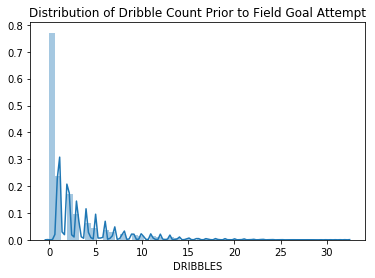

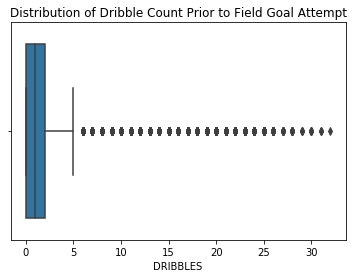

count    128069.000000
mean          2.023355
std           3.477760
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          32.000000
Name: DRIBBLES, dtype: float64


In [81]:
#Start with Dribbles 
sns.distplot(shots['DRIBBLES'])
plt.title('Distribution of Dribble Count Prior to Field Goal Attempt')
plt.show()

sns.boxplot(x=shots["DRIBBLES"])
plt.title('Distribution of Dribble Count Prior to Field Goal Attempt')
plt.show()
print(shots['DRIBBLES'].describe())

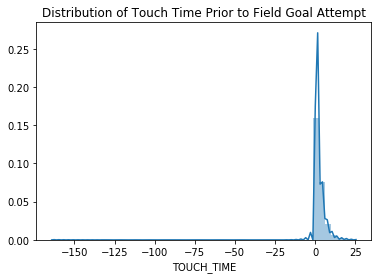

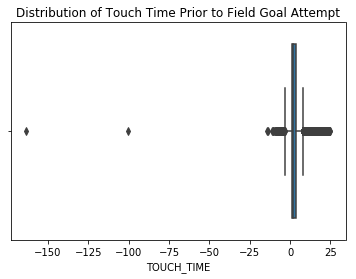

count    128069.000000
mean          2.765901
std           3.043682
min        -163.600000
25%           0.900000
50%           1.600000
75%           3.700000
max          24.900000
Name: TOUCH_TIME, dtype: float64


In [82]:
#Now, look at touch time
sns.distplot(shots['TOUCH_TIME'])
plt.title('Distribution of Touch Time Prior to Field Goal Attempt')
plt.show()

sns.boxplot(x=shots["TOUCH_TIME"])
plt.title('Distribution of Touch Time Prior to Field Goal Attempt')
plt.show()
print(shots['TOUCH_TIME'].describe())

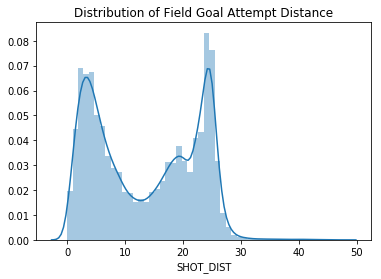

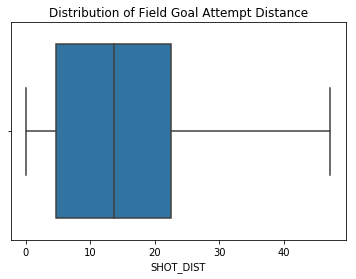

count    128069.000000
mean         13.571504
std           8.888964
min           0.000000
25%           4.700000
50%          13.700000
75%          22.500000
max          47.200000
Name: SHOT_DIST, dtype: float64


In [83]:
#Next, look at shot distance
sns.distplot(shots['SHOT_DIST'])
plt.title('Distribution of Field Goal Attempt Distance')
plt.show()

sns.boxplot(x=shots["SHOT_DIST"])
plt.title('Distribution of Field Goal Attempt Distance')
plt.show()
print(shots['SHOT_DIST'].describe())

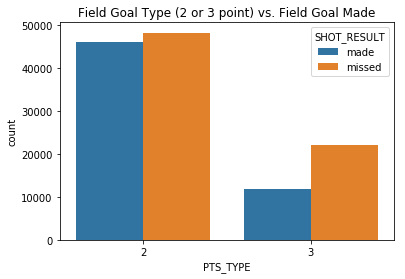

In [84]:
#Now look at shot type and shots made
sns.countplot(x='PTS_TYPE', hue='SHOT_RESULT', data=shots)
plt.title('Field Goal Type (2 or 3 point) vs. Field Goal Made')
plt.show()

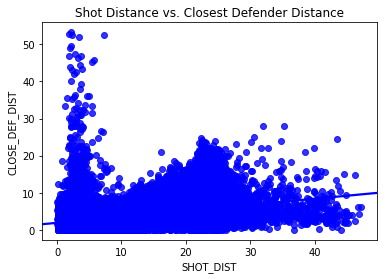

In [85]:
sns.regplot(x=shots.SHOT_DIST, y=shots.CLOSE_DEF_DIST, color="b")
plt.title('Shot Distance vs. Closest Defender Distance')
plt.show()

## Data Cleaning

In [86]:
#Remove insignificant columns that can't be used as features

shots = shots.drop(['GAME_ID', 'MATCHUP', 'GAME_CLOCK', 'CLOSEST_DEFENDER_PLAYER_ID', 'CLOSEST_DEFENDER', 'FGM', 'PTS', 'player_name', 'player_id'], 1)
shots.head(5)

,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSE_DEF_DIST
0,A,W,24,1,1,10.8,2,1.9,7.7,2,made,1.3
1,A,W,24,2,1,3.4,0,0.8,28.2,3,missed,6.1
2,A,W,24,3,1,NaN,3,2.7,10.1,2,missed,0.9
3,A,W,24,4,2,10.3,2,1.9,17.2,2,missed,3.4
4,A,W,24,5,2,10.9,2,2.7,3.7,2,missed,1.1


In [87]:
#Determine missing values across dataframe

missing_values_count = shots.isnull().sum()
print(missing_values_count)

LOCATION             0
W                    0
FINAL_MARGIN         0
SHOT_NUMBER          0
PERIOD               0
SHOT_CLOCK        5567
DRIBBLES             0
TOUCH_TIME           0
SHOT_DIST            0
PTS_TYPE             0
SHOT_RESULT          0
CLOSE_DEF_DIST       0
dtype: int64


In [88]:
#Since we have over 120k observations, I think we can go ahead and drop these observations
#instead of imputing

shots = shots.dropna()

## Feature Selection / Engineering

In [89]:
#Convert categorical data types to binary

shots['LOCATION'] = np.where((shots['LOCATION'] == 'H'), 1, 0) #Home = 1, Away = 0
shots['W'] = np.where((shots['W'] == 'W'), 1, 0) #Win = 1, Loss = 0
shots['PTS_TYPE'] = np.where((shots['PTS_TYPE'] == 3), 1, 0) #3 pointer = 1, 2 pointer = 0
shots['SHOT_RESULT'] = np.where((shots['SHOT_RESULT'] == 'made'), 1, 0) #Made = 1, Missed = 0

#Confirm this worked
shots.head(5)

,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSE_DEF_DIST
0,0,1,24,1,1,10.8,2,1.9,7.7,0,1,1.3
1,0,1,24,2,1,3.4,0,0.8,28.2,1,0,6.1
3,0,1,24,4,2,10.3,2,1.9,17.2,0,0,3.4
4,0,1,24,5,2,10.9,2,2.7,3.7,0,0,1.1
5,0,1,24,6,2,9.1,2,4.4,18.4,0,0,2.6


In [ ]:
#Think of new features!

## Run Initial Models

In [ ]:
Make Period a categorical (pd.get_dummies)